In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rounakbanik_ted_talks_path = kagglehub.dataset_download('rounakbanik/ted-talks')

print('Data source import complete.')


100%|██████████| 12.0M/12.0M [00:00<00:00, 49.7MB/s]

Extracting files...


Data source import complete.


In [2]:
rounakbanik_ted_talks_path

'/root/.cache/kagglehub/datasets/rounakbanik/ted-talks/versions/3'

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#8B0000;
           font-size:200%;
           font-family:Newtime-Roman;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:35px; color:white; text-align:center"> Introduction</p>
</div>

<div style="border-radius:10px; border:#8B0000 solid;padding: 15px;background-color:aliceblue; font-size:110%;text-align:left">

The goal of this work  is to Exploratory Data analysis (EDA) for the TED Talks dataset.  
**The main tasks of EDA:**  
- Study of the target feature
- Study features
- Study of the influence of features on the target

The most basic thing to understand is that EDA is an important stage of the ML project, within this stage we can already put forward hypotheses, and EDA can also help with data preprocessing (EDA provides information about the distribution of variables) to improve the learning process, which will ultimately affect the metric.

**Important:** every graph within the EDA should show us something, otherwise he doesn't make sense

## 🌍 If the work is useful for you, please upvote 🌍
## 🌍 If you have any questions about the work, I will be happy to answer in the comments 🌍 ##

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#8B0000;
           font-size:200%;
           font-family:Newtime-Roman;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:35px; color:white; text-align:center"> About TED</p>
</div>

![Best-TED-Talks-From-The-Curator-Himself-.jpg](attachment:29e734d6-4132-4239-a43c-14ec1a7b5cc4.jpg)

<div style="border-radius:10px; border:#8B0000 solid;padding: 15px;background-color:aliceblue; font-size:110%;text-align:left">
    
**TED (Technology, Entertainment, Design)** - An American private non-profit foundation, known primarily for its annual conferences. The conferences have been held since 1984 in Monterey (California, USA), since 2009 in Long Beach (California, USA), and since 2014 in Vancouver, Canada.

The mission of the conference is to spread unique ideas ("ideas worth spreading"), selected lectures are available on the conference website. The topics of lectures are diverse: science, art, design, politics, culture, business, global issues, technology and entertainment. The list of speakers included such famous personalities as the 42nd US President Bill Clinton, Nobel laureates James Watson, Murray Gell-Mann, as well as the founder of Wikipedia Jimmy Wales.

The curator of the conference and its permanent presenter is Chris Anderson.

The first TED conference was held in 1984 and was organized by Richard Sol Wurman and Harry Marks. It featured a newly released Macintosh computer created by Sony CD. Mathematician Benoit Mandelbrot demonstrated the practical application of the fractal theory he created. Artificial intelligence specialist Marvin Minsky explained the new model of the mind.

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#8B0000;
           font-size:200%;
           font-family:Newtime-Roman;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:35px; color:white; text-align:center"> Libraries import</p>
</div>

In [ ]:
import numpy as np
import pandas as pd
import ast
from datetime import datetime
import plotly
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import warnings

warnings.filterwarnings('ignore')  # ignore notifications

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#8B0000;
           font-size:200%;
           font-family:Newtime-Roman;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:35px; color:white; text-align:center"> Dataset</p>
</div>

### Dataset: Information about TED talks until September 21st, 2017

In [ ]:
data_path = '/root/.cache/kagglehub/datasets/rounakbanik/ted-talks/versions/3/ted_main.csv'

df = pd.read_csv(data_path)

In [ ]:
df.head(3)

<div style="border-radius:10px; border:#8B0000 solid;padding: 15px;background-color:aliceblue; font-size:110%;text-align:left">

### Features:
- **main_speaker:** The first named speaker of the talk.
- **name:** The official name of the TED Talk. Includes the title and the speaker.
- **title:** The title of the talk
- **description:** A blurb of what the talk is about.
- **speaker_occupation:** The occupation of the main speaker.
- **num_speaker:** The number of speakers in the talk.
- **published_date:** The Unix timestamp for the publication of the talk on TED.com
- **duration:** The duration of the talk in seconds.
- **event:** The TED event where the talk took place.
- **film_date:** The Unix timestamp of the filming.
- **comments:** The number of first level comments made on the talk.
- **tags:** The themes associated with the talk.
- **languages:** The number of languages in which the talk is available.
- **ratings:** A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.)
- **related_talks:** A list of dictionaries of recommended talks to watch next.
- **url:** The URL of the talk.
- **views:** The number of views on the talk.

In [ ]:
# translating data into a convenient format
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df['film_date'] = df['film_date'].apply(lambda x: datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['year'] = df['film_date'].apply(lambda x: x.split('-')[2]).astype('int16')
df['duration'] = df['duration'] / 60
df['duration'] = df['duration'].round(2)

def getday(x):
    day, month, year = (int(i) for i in x.split('-'))
    answer = datetime(year, month, day).weekday()
    return day_order[answer]

df['day'] = df['film_date'].apply(getday)

df['month'] = df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1])

In [ ]:
df.head(3)

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#8B0000;
           font-size:200%;
           font-family:Newtime-Roman;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:35px; color:white; text-align:center"> Graphs</p>
</div>

In [ ]:
fig = px.bar(df[['comments', 'main_speaker']].sort_values(by='comments', ascending=False)[0:15],
             x='main_speaker', y='comments',
        color_discrete_sequence=['darkred'], template='plotly_dark', title="<b> Which people's performances are commented on the most?")
fig.update_layout(title_x=0.5, xaxis_title="Person", yaxis_title="Number of comments")

In [ ]:
fig = px.scatter(df, x="views", y="comments", trendline="ols", color_discrete_sequence=['red'],
                template='plotly_dark', title='<b>', color='comments', color_continuous_scale=px.colors.sequential.Reds)
fig.update_layout(title_x=0.5, title_text='Dependence of comments of views', xaxis_title='Views', yaxis_title='Comments')
fig.show()

In [ ]:
fig = px.histogram(df, x="languages",
                   color_discrete_sequence=['darkred'])
fig.update_layout(title_x=0.5, title_text='<b>Histogram of the number of languages', template='plotly_dark',
                  xaxis_title='Languages', yaxis_title='Count')
fig.show()

In [ ]:
fig = px.line(df.groupby('year').size().reset_index().rename(columns={0:'Number of performances'}),
              x='year', y='Number of performances', markers=True,
             color_discrete_sequence=['darkred'], template='plotly_dark', title="<b> Number of performances by year")
fig.update_layout(title_x=0.5, xaxis_title="Year", yaxis_title="Number of perfomances")
fig.show()

In [ ]:
jj = df.loc[df['year']== 2017, :]
fig = px.line(jj, x='published_date', y="duration", color_discrete_sequence=['darkred'], markers=True)
fig.update_layout(title_x=0.5, xaxis_title='Published date', yaxis_title='Duration',
                  title_text='<b>Duration of performances for 2017', template='plotly_dark')
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('<i>Histogram of the duration of perfomances', '<i>Performances with the long duration',))
fig.add_trace(go.Histogram(x = df['duration'].loc[df['duration'] < 70], marker_color='darkred'), row=1, col=1)
fig.update_layout(template='plotly_dark', title_text='<b>Durations', title_x=0.5, showlegend=False)
df_n = df.nlargest(5, 'duration')
fig.add_trace(go.Bar(
    x=df_n['main_speaker'],
    y=df_n['duration'],
    marker_color='indianred', width=[0.5, 0.5, 0.5, 0.5, 0.5]), row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="Duration of performance (minutes)", row=1, col=1)
fig.update_yaxes(title_text="Durations (in minutes)", row=1, col=2)
fig.update_xaxes(title_text="Main speaker", row=1, col=2)
fig.show()

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=('<i>Histogram of the views of perfomances', '<i>Top 5 speakers by the number of views of the performance',))
fig.add_trace(go.Histogram(x = df['views'].loc[df['views'] < 6000000], marker_color='darkred'), row=1, col=1)
fig.update_layout(template='plotly_dark', title_text='<b>Views', title_x=0.5, showlegend=False)
df_nlar = df.nlargest(5, 'views')
fig.add_trace(go.Bar(
    x=df_nlar['main_speaker'],
    y=df_nlar['views'],
    marker_color='indianred', width=[0.5, 0.5, 0.5, 0.5, 0.5]), row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="Views", row=1, col=1)
fig.update_yaxes(title_text="Views", row=1, col=2)
fig.update_xaxes(title_text="Main speaker", row=1, col=2)

fig.show()

In [ ]:
hmap_df = df.copy()
hmap_df['film_date'] = hmap_df['film_date'].apply(lambda x: month_order[int(x.split('-')[1]) - 1] + " " + str(x.split('-')[2]))
hmap_df = pd.pivot_table(hmap_df[['film_date', 'title']], index='film_date', aggfunc='count').reset_index()
hmap_df['month_num'] = hmap_df['film_date'].apply(lambda x: months[x.split()[0]])
hmap_df['year'] = hmap_df['film_date'].apply(lambda x: x.split()[1])
hmap_df = hmap_df.sort_values(['year', 'month_num'])
hmap_df = hmap_df[['month_num', 'year', 'title']]
hmap_df = hmap_df.pivot('month_num', 'year', 'title')
hmap_df = hmap_df.fillna(0)


fig=px.imshow(hmap_df, text_auto=True, template='plotly_dark', color_continuous_scale=px.colors.sequential.Reds, aspect='auto',title='<b>Correlation matrix',
             y=month_order)
fig.update_layout(title_x=0.5, xaxis_title='Year', yaxis_title='Month', title_text='<b>Performances by year depending on the month')
fig.show()

In [ ]:
ma = df.groupby('speaker_occupation').size().reset_index().rename(columns={0:'Number of perfomances',
                                                                      'speaker_occupation': 'Speaker Occupation'}).sort_values('Number of perfomances', ascending=False)[0:15]
fig = px.pie(ma, values='Number of perfomances', names='Speaker Occupation', color_discrete_sequence=px.colors.sequential.amp)
fig.update_layout(title_x=0.5, xaxis_title='', yaxis_title='', title_text='<b>Speakers occupations')
fig.update_traces(textposition='inside', textinfo='percent+label', marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(template='plotly_dark', title_x=0.5, title_text='<b>Speakers occupations')
fig.show()

In [ ]:
kk = df.groupby('day').size().reset_index().rename(columns={0: 'Size'})
hh = df.groupby('month').size().reset_index().rename(columns={0:'Size'})

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=kk['day'], values=kk['Size'], name="Days", textinfo='label+percent', showlegend=False,
               pull=[0, 0, 0, 0, 0.07, 0, 0], marker=dict(colors=px.colors.sequential.amp[0:7])),
               1, 1)

fig.add_trace(go.Pie(labels=hh['month'], values=hh['Size'], name="Months", textinfo='label+percent', showlegend=True,
              pull=[0, 0, 0, 0.07, 0, 0, 0, 0, 0, 0, 0, 0], marker=dict(colors=px.colors.sequential.amp)),
              1, 2)

fig.update_traces(hole=.3, hoverinfo="label+percent+name", textposition='inside')
fig.update_layout(template='plotly_dark', legend_title='Month',
    title_x=0.5, title_text="<b>The ratio of the number of performances by day and month",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Days', x=0.195, y=0.5, font_size=20, showarrow=False),
                 dict(text='Months', x=0.82, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'
theme_df = df.drop('tags', axis=1).join(s)

In [ ]:
tt = theme_df['theme'].reset_index().groupby('theme').size().sort_values(ascending=False)[0:10].reset_index().rename(columns={0:'Count'})
fig = px.bar(tt,
             x='theme', y='Count',
        color_discrete_sequence=['darkred'], template='plotly_dark', title="<b>Top 10 topic of performances by number")
fig.update_layout(title_x=0.5, xaxis_title="Topic", yaxis_title="Number of perfomances")

In [ ]:
pop_theme = theme_df.loc[theme_df['theme'].isin(tt['theme']), :]
fig = px.box(pop_theme, x="theme", y="duration", color_discrete_sequence=['darkred'])
fig.update_layout(title_x=0.5, title_text='<b>Boxplots', xaxis_title='Topic', yaxis_title='Duration', template='plotly_dark')
fig.show()

In [ ]:
pop_theme = theme_df.loc[theme_df['theme'].isin(tt['theme']), :]
fig = px.box(pop_theme, x="theme", y="languages", color_discrete_sequence=['darkred'])
fig.update_layout(title_x=0.5, title_text='<b>Boxplots', xaxis_title='Topic', yaxis_title='Languages', template='plotly_dark')
fig.show()

<div style="color:white;
           display:fill;
           border-radius:15px;
           background-color:#8B0000;
           font-size:200%;
           font-family:Newtime-Roman;
           font-style: Arial;
           letter-spacing:0.10px">

<p style="font-size:35px; color:white; text-align:center"> End</p>
</div>

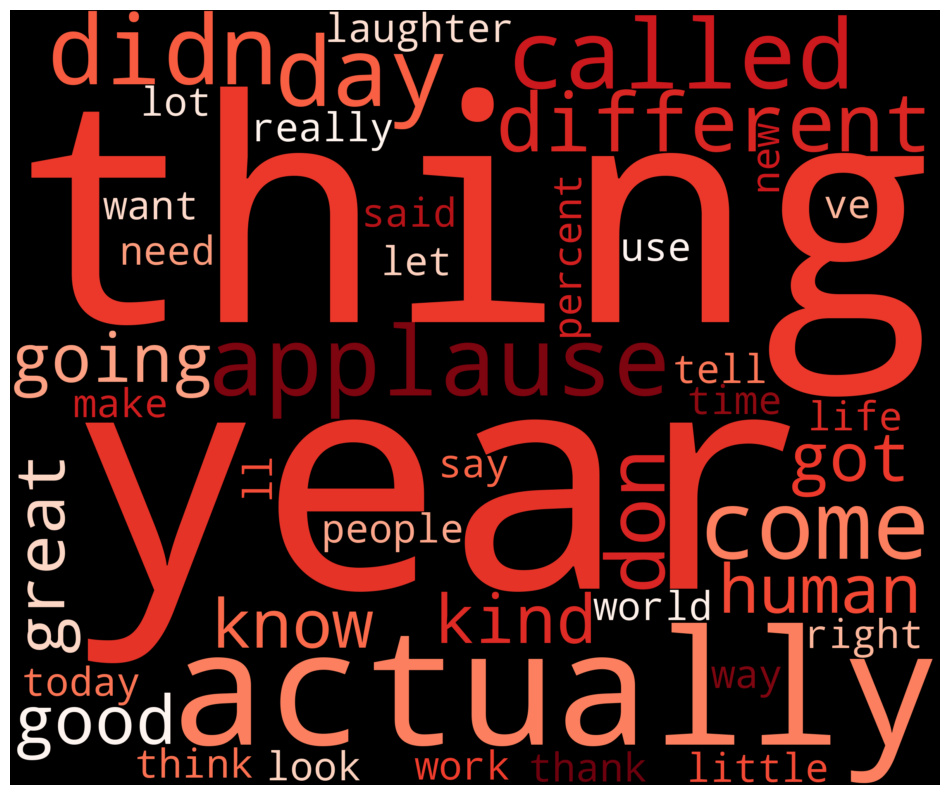

In [3]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Example DataFrame (replace with your actual `df2` dataset)
df2 = pd.read_csv('/root/.cache/kagglehub/datasets/rounakbanik/ted-talks/versions/3/transcripts.csv')
# Combine all text
corpus = ' '.join(df2['transcript'])

# Optional: Replace unnecessary punctuation with spaces
corpus = corpus.replace('.', '. ')

# Apply TF-IDF to extract important words
vectorizer = TfidfVectorizer(stop_words='english', max_features=50)  # Limit to top 50 terms
tfidf_matrix = vectorizer.fit_transform([corpus])
keywords = vectorizer.get_feature_names_out()

# Generate a word cloud using only top TF-IDF keywords
keyword_corpus = ' '.join(keywords)
wordcloud = WordCloud(
    stopwords=STOPWORDS,  # Remove common and custom stopwords
    background_color='black',
    colormap='Reds',
    width=2400,
    height=2000
).generate(keyword_corpus)

# Display the word cloud
plt.figure(figsize=(12, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
